#### `What are CRM Analytics?`

CRM analytics are data that demonstrate your company’s sales and customer service performance. CRM analytics also presents customer data that you can use to inform smarter business decisions. Typically, you’ll use CRM software to obtain CRM analytics and automate all your data collection and report generation.

#### `Benefits of CRM Analysis`

The primary benefit of CRM analysis is that you can use it to inform your sales, customer service and marketing processes. You can use your CRM analytics to improve your methods via:

* **Customer service evaluations.** CRM analytics fill you in on your customer service team’s performance. If you see figures that your team could improve, implement practices that push your team toward these goals.
* **Accurate customer data.** Whether you’re using your customer data for demographic marketing or email marketing, you need to know whether you’re reaching the right person. CRM analysis ensures you’re doing just that.
* **Thorough customer analytics.** How much does your customer usually spend per quarter with you? Are they buying the same products time and time again, or does it vary? With CRM analytics, you’ll get firm answers to these questions, and you can use what you learn to refine your marketing strategies.
* **Efficient lead generation.** Your CRM analysis can tell you which of your marketing efforts most strongly correlate to purchases. If you see one approach correlating strongly to purchases but have only targeted a sliver of your customers with that approach, try that method more – your sales might increase.

### Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as pg
from plotly.offline import iplot

### Load and check data

In [3]:
df = pd.read_csv("data.csv", header=0, dtype= {'CustomerID' : str, 'InvoiveID' :  str}, encoding='unicode_escape',
                    parse_dates=["InvoiceDate"], infer_datetime_format=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Understanding Data

####   `Context`

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

#### `Variable Description`

* **InvoiceNo**: Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
* **StockCode**: Product code that consists 5 digits.
* **Description**: Product name.
* **Quantity**: The quantities of each product per transaction.
* **InvoiceDate**: Represents the day and time when each transaction was generated.
* **UnitPrice**: Product price per unit.
* **CustomerID**: Customer number that consists 5 digits. Each customer has a unique customer ID.
* **Country**: Name of the country where each customer resides.

In [4]:
def check_data(dataframe, head=5):
    '''
        The basic function of the check data function is to print the:
        shape, rows, columns, types, head, tail, missing values, duplicated values, and quantiles 
        in a structured format.
    '''
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_data(df)

------------------------------- SHAPE --------------------------------
Rows: 541909
Columns: 8
------------------------------- TYPES --------------------------------
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object
-------------------------------- HEAD --------------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 0

In [13]:
world_map = df[['CustomerID', 'InvoiceNo', 'Country']
              ].groupby(['CustomerID', 'InvoiceNo', 'Country']
                       ).count().reset_index(drop = False)
countries = world_map["Country"].value_counts()

data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names',
            z = countries,
            text = countries.index,
            colorbar = {'title':'Orders'},
            colorscale='Viridis',
            reversescale = False)

layout = dict(title={'text': "Number of Orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution = 50,
                         showocean = True,
                         oceancolor = "LightBlue",
                         showland = True,
                         landcolor = "whitesmoke",
                         showframe = True),
             template = 'plotly_white',
             height = 600,
             width = 1000)

choromap = pg.Figure(data = [data], layout = layout)
iplot(choromap, validate = False)


### Descriptive Statistics

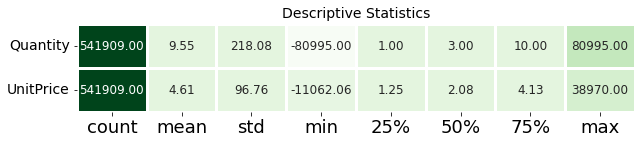

In [36]:
def desc_stats(dataframe):
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= dataframe.describe().T.columns,
                           data= dataframe.describe().T)
    
    f,ax = plt.subplots(figsize=(10,
                                 desc_df.shape[0] * 0.81))
    sns.heatmap(desc_df,
                annot = True,
                cmap = "Greens",
                fmt = '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.1,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 18)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df.select_dtypes(include = [float, int]))

<AxesSubplot:>

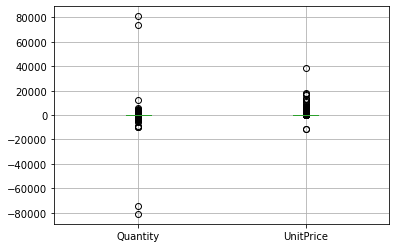

In [37]:
df.boxplot()

* 📌 It is clearly seems that there are ouliters in Quantity and UnitPrice that have to be handled
* 📌 There are negative values in UnitPrice and Quantity because of cancelled orders.
* 📌 Missing values in Customer ID and Description.
* 📌 Quantity and Unit Price should be multiplied in order to create Total Price.